#**Task 1 – Term Deposit Subscription Prediction**
**In this task, you will predict whether a customer will subscribe to a term deposit based on data collected during a bank’s marketing campaign. This is a real-world classification problem using the UCI Bank Marketing Dataset.**

##**Import Required Libraries**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings("ignore")


##**Load Dataset**

In [ ]:
#Load the dataset
df = pd.read_csv("/content/bank-full.csv", sep=';')  # Dataset must be in the same directory
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


 ##  **Dataset Overview**

In [ ]:
#Understanding dataset structure
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
df.info()


Shape: (45211, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 n

##**Check Missing Values**

In [ ]:
#Checking for missing/null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


##**Visualize Target Distribution**

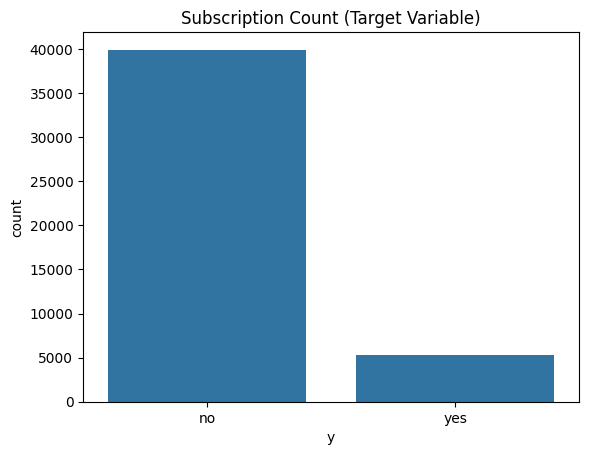

In [ ]:
#Target variable distribution
sns.countplot(x='y', data=df)
plt.title("Subscription Count (Target Variable)")
plt.show()


##**Encode Target Variable**

In [ ]:
#Encode target variable ('y')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()


,count
y,
0,39922
1,5289


##**Encode Categorical Variables**

In [ ]:
#  Encoding all categorical features using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


##**Train-Test Split**

In [ ]:
#  Splitting into features and labels, then train-test split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##**Train Logistic Regression**

In [ ]:
#  Training Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


##**Train Random Forest**

In [ ]:
# Training Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


##**Confusion Matrix (Logistic Regression)**

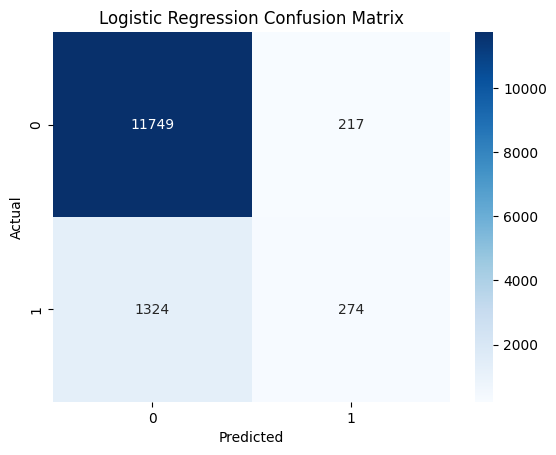

In [ ]:
# Confusion Matrix for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##**Confusion Matrix (Random Forest)**

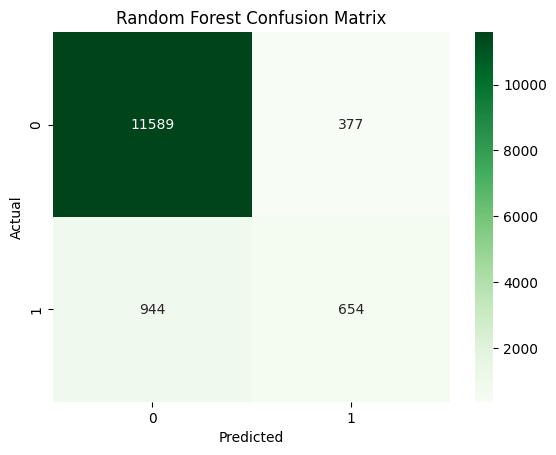

In [ ]:
#  Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##**Classification Report (Logistic Regression)**

In [ ]:
#Classification Report for Logistic Regression
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



 ## **Classification Report (Random Forest)**

In [ ]:
# Classification Report for Random Forest
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.41      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



##**F1-Score Comparison**

In [ ]:
#  F1-Score comparison
f1_lr = f1_score(y_test, y_pred_lr)
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score - Logistic Regression:", f1_lr)
print("F1 Score - Random Forest:", f1_rf)


F1 Score - Logistic Regression: 0.26232647199617043
F1 Score - Random Forest: 0.497527577025485


**ROC Curve (Both Models)**

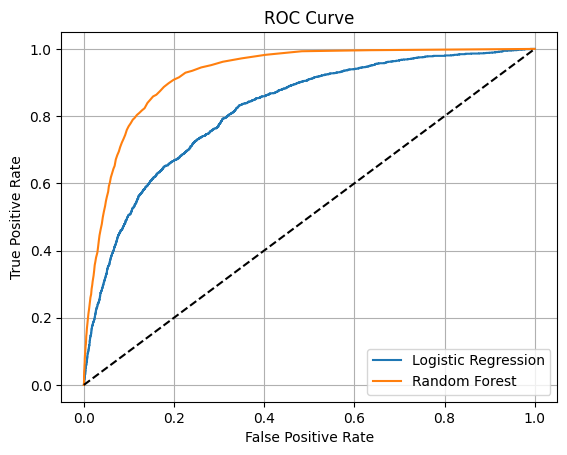

In [ ]:
#  Plotting ROC Curve
y_probs_lr = lr.predict_proba(X_test)[:, 1]
y_probs_rf = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


##**ROC AUC Score**

In [ ]:
#  ROC AUC Scores
print("ROC AUC - Logistic Regression:", roc_auc_score(y_test, y_probs_lr))
print("ROC AUC - Random Forest:", roc_auc_score(y_test, y_probs_rf))


ROC AUC - Logistic Regression: 0.8182717637394394
ROC AUC - Random Forest: 0.9240565728889341


 ## **SHAP Explainer Setup (Tree-based)**

In [ ]:
#Initialize SHAP explainer for Random Forest
sample_X = X_test.sample(100, random_state=42)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(sample_X)



In [ ]:
sample_X = X_test.sample(100, random_state=42)


In [ ]:
explainer = shap.TreeExplainer(rf)


In [ ]:
shap_values = explainer.shap_values(sample_X)[1]


100%|===================| 199/200 [00:13<00:00]       

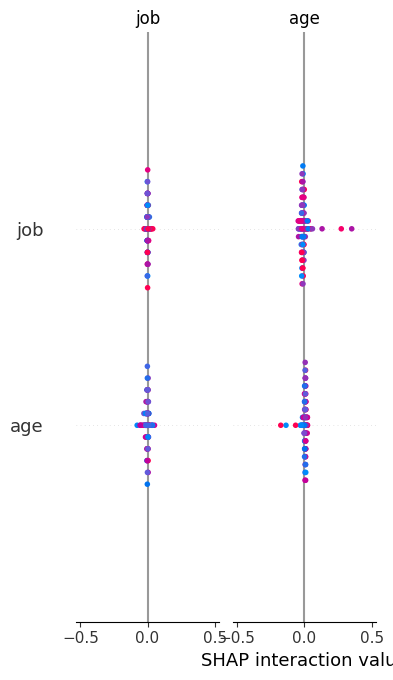

In [ ]:
import shap

# Sample 100 instances from X_test
sample_X = X_test.sample(100, random_state=42)

#  Use general explainer
explainer = shap.Explainer(rf, X_train)  # Use X_train to initialize explainer

#  Get SHAP values for sample
shap_values = explainer(sample_X)

#  Plot summary
shap.summary_plot(shap_values, sample_X)
